In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("global_energy_consumption.csv")

In [3]:
df

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48
...,...,...,...,...,...,...,...,...,...,...
9995,Canada,2017,9786.50,30481.07,14.87,70.25,53.93,19.94,620.85,0.29
9996,UK,2011,7200.88,37402.75,89.00,16.55,24.35,20.57,830.73,0.48
9997,India,2011,2579.82,44516.91,46.65,68.06,57.01,33.73,993.78,0.08
9998,UK,2020,5950.39,22289.39,43.43,68.57,34.94,25.40,199.85,0.47


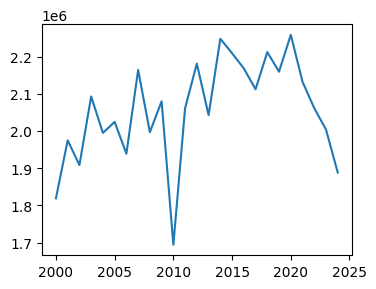

In [4]:
all = df.groupby("Year").agg({"Total Energy Consumption (TWh)":"sum"})
fig = plt.figure()
fig.set_size_inches(4,3)
plt.plot(all)

In [5]:
### Категориальные
cat_cols=list(df.select_dtypes(include='object').columns)
### Вещественные
num_cols=list(df.select_dtypes(exclude='object').columns)

## Предварительный анализ данных

<BarContainer object of 10 artists>

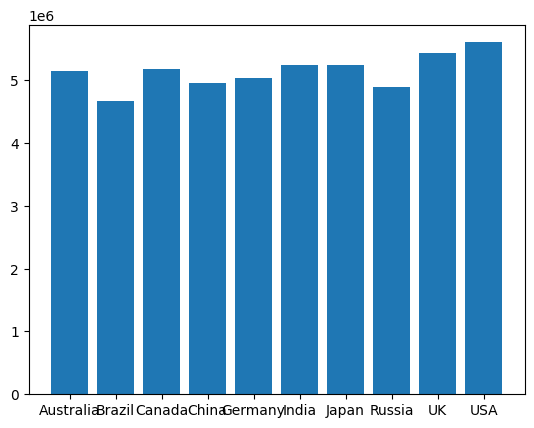

In [6]:
x = df.groupby(["Country"]).agg({"Total Energy Consumption (TWh)":"sum"}).reset_index()
# x = x["Total Energy Consumption (TWh)"]

plt.bar(x["Country"], x["Total Energy Consumption (TWh)"])

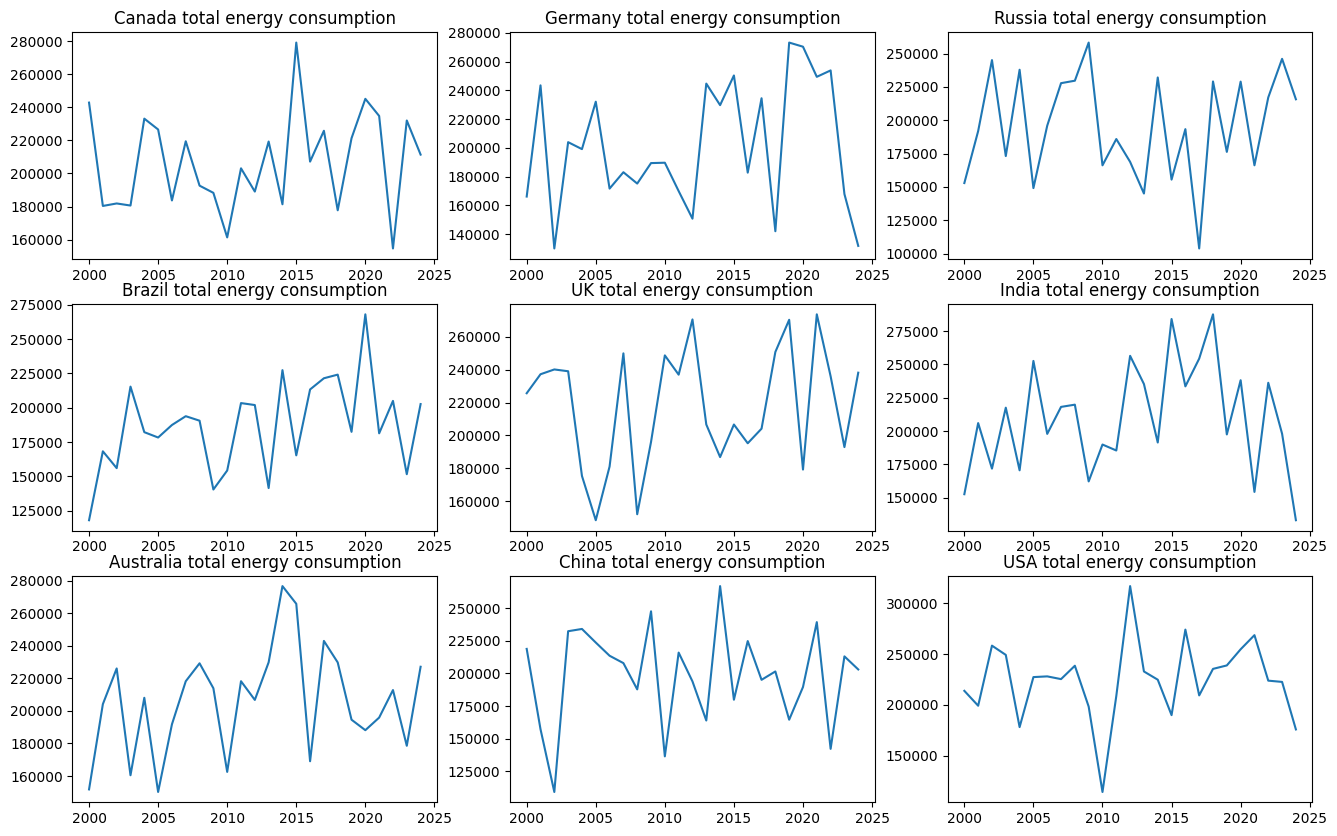

In [7]:
fig = plt.figure()
fig.set_size_inches(16, 10)
country_list = df["Country"].unique().tolist()
country_list
count = 1
for countr in country_list[0:9]:
    ax_1 = fig.add_subplot(3, 3, count) ## (строки матрицы, столбцов, номер) графика
    x = df.groupby(["Country","Year"]).agg({"Total Energy Consumption (TWh)":"sum"}).loc[countr]
    ax_1.set(title=countr+" total energy consumption")
    plt.plot(x)
    count+=1
    



                                     Year  Total Energy Consumption (TWh)  \
Year                             1.000000                        0.009024   
Total Energy Consumption (TWh)   0.009024                        1.000000   
Per Capita Energy Use (kWh)     -0.010088                       -0.016593   
Renewable Energy Share (%)       0.000641                       -0.020622   
Fossil Fuel Dependency (%)      -0.001629                       -0.008595   
Industrial Energy Use (%)        0.010028                        0.003082   
Household Energy Use (%)         0.010852                       -0.005548   
Carbon Emissions (Million Tons)  0.013437                        0.013643   
Energy Price Index (USD/kWh)     0.001178                        0.005288   

                                 Per Capita Energy Use (kWh)  \
Year                                               -0.010088   
Total Energy Consumption (TWh)                     -0.016593   
Per Capita Energy Use (kWh)          

<Axes: >

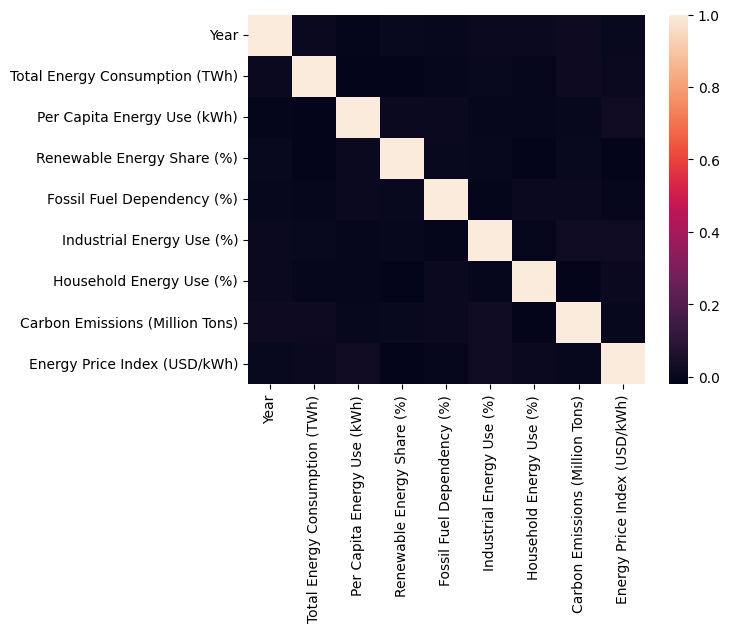

In [8]:
print(df[num_cols].corr())
sns.heatmap(df[num_cols].corr())

In [9]:
df.isna().sum()

Country                            0
Year                               0
Total Energy Consumption (TWh)     0
Per Capita Energy Use (kWh)        0
Renewable Energy Share (%)         0
Fossil Fuel Dependency (%)         0
Industrial Energy Use (%)          0
Household Energy Use (%)           0
Carbon Emissions (Million Tons)    0
Energy Price Index (USD/kWh)       0
dtype: int64

In [10]:
for cat in cat_cols:
    res = df.groupby(cat).sum().var()
    print(res)

Year                               3.751773e+09
Total Energy Consumption (TWh)     7.267530e+10
Per Capita Energy Use (kWh)        8.262626e+11
Renewable Energy Share (%)         3.151191e+06
Fossil Fuel Dependency (%)         1.773991e+06
Industrial Energy Use (%)          1.337800e+06
Household Energy Use (%)           5.107685e+05
Carbon Emissions (Million Tons)    7.633164e+09
Energy Price Index (USD/kWh)       1.530277e+02
dtype: float64


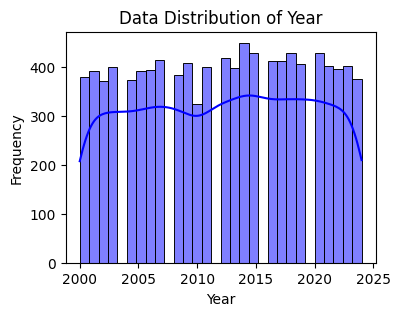

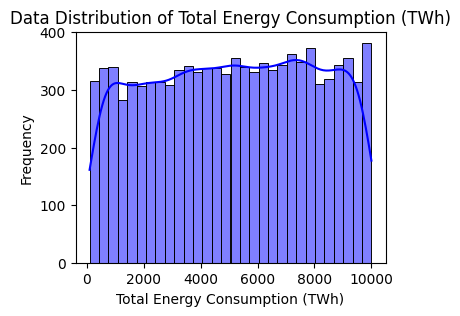

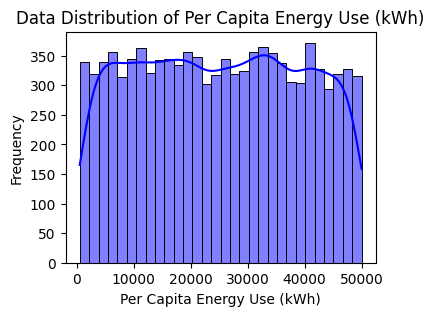

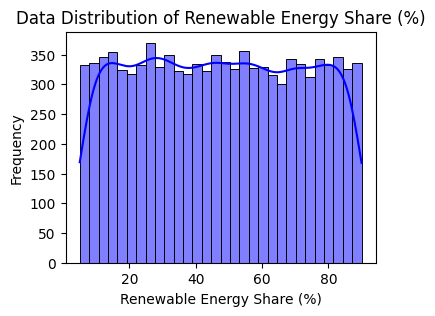

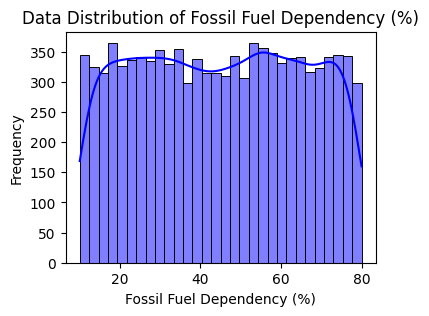

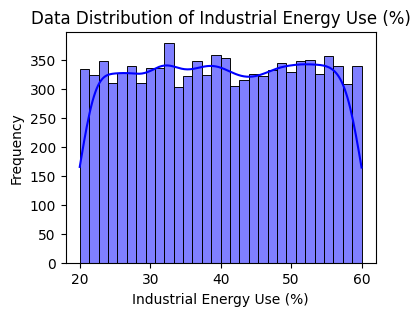

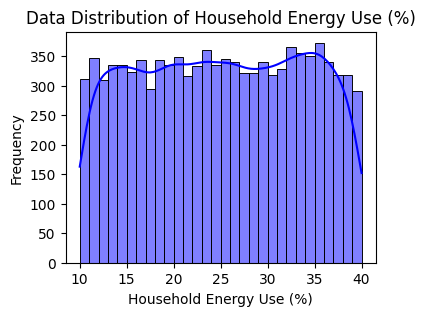

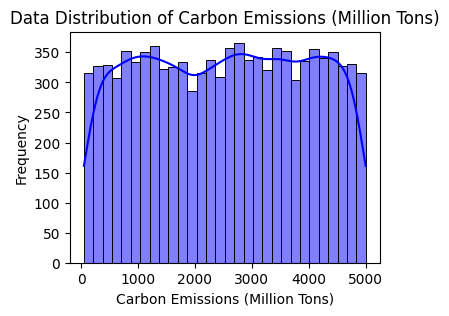

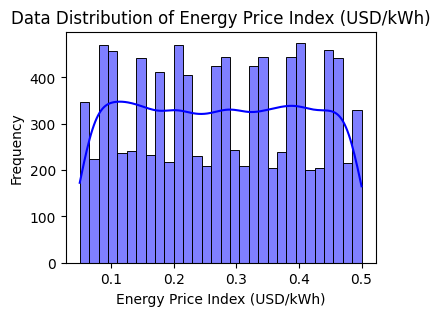

In [11]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    fig = plt.figure()
    fig.set_size_inches(4,3)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Data Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

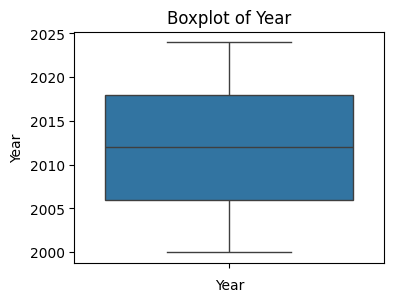

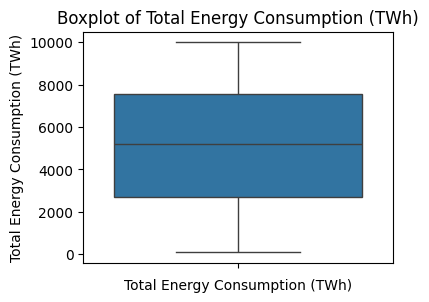

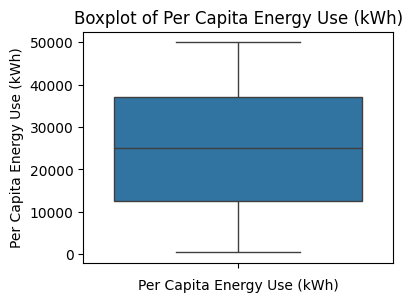

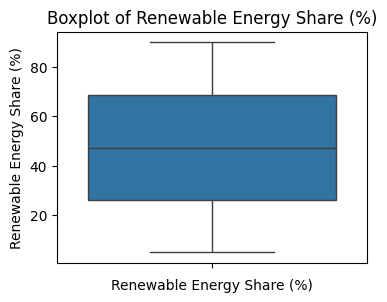

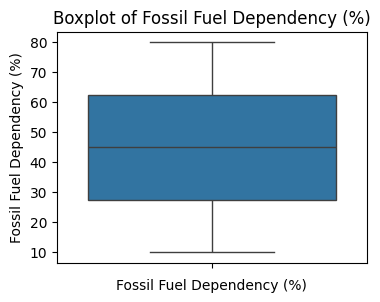

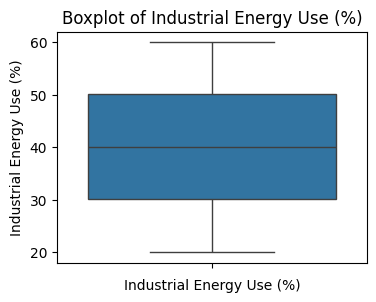

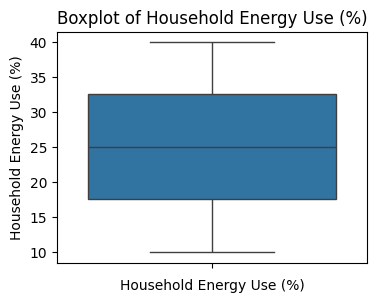

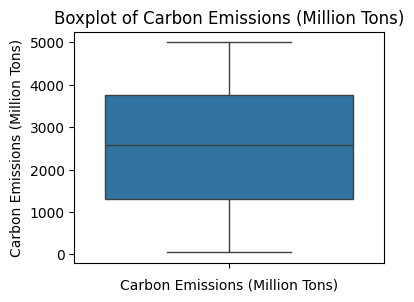

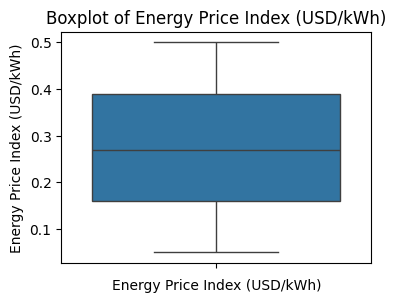

In [12]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    fig = plt.figure()
    fig.set_size_inches(4,3)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

In [13]:
X = df.drop(columns=["Total Energy Consumption (TWh)", "Country"])
Y = np.log1p(df['Total Energy Consumption (TWh)'])

In [14]:

from sklearn.model_selection import train_test_split, TimeSeriesSplit

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


pipe = Pipeline([("scaler", StandardScaler()),
                 ("lasso", SVR())])
pipe.fit(X_train, y_train)
train_acc = mean_squared_error(y_train, pipe.predict(X_train))
test_acc = mean_squared_error(y_test, pipe.predict(X_test))

In [16]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("lasso", LinearRegression())])
pipe.fit(X_train, y_train)
train_acc = mean_squared_error(y_train, pipe.predict(X_train))
test_acc = mean_squared_error(y_test, pipe.predict(X_test))

In [17]:
train_acc

0.7725415107976561

In [18]:
test_acc

0.7412800705135542

In [19]:
tscv = TimeSeriesSplit()
print(tscv)
TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = Y[train_index], Y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [   0    1    2 ... 1667 1668 1669] TEST: [1670 1671 1672 ... 3333 3334 3335]


KeyError: "None of [Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n       ...\n       1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669],\n      dtype='int64', length=1670)] are in the [columns]"